## Analysis of Polynomial Function

f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1. Determine roots
2. Find intervals where the function increases
3. Find intervals where the function decreases
4. Plot the graph
5. Calculate vertex
6. Determine intervals where f > 0
7. Determine intervals where f < 0

In [1]:
# impport libriries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set global parameters 
pd.set_option('precision', 2)

In [3]:
# initialize constants
a, b, c, d, e = -12, -18, 5, 10, -30

limit = 5
step = 1e-3

In [4]:
# polynomial
def f(x):
    return a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x - e

In [5]:
# range of x- and y- values
x = np.arange(-limit, limit, step)
y = f(x)

In [6]:
# create dataframe
df = pd.DataFrame({'x-coord': x, 'y-coord': y})
display(df.head())

,x-coord,y-coord
0,-5.0,255.95
1,-5.0,263.14
2,-5.0,270.32
3,-5.0,277.50
4,-5.0,284.66


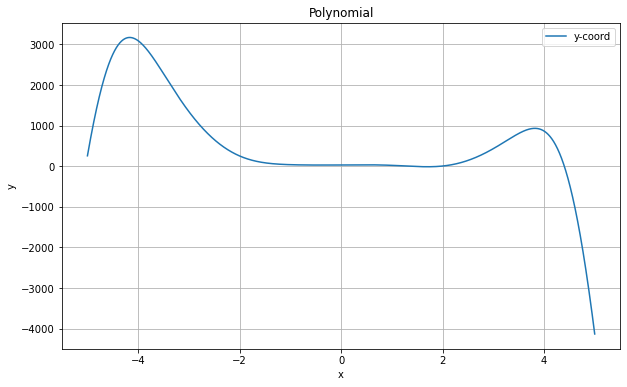

In [7]:
# plot polynomial
plt.rcParams['figure.figsize'] = [10, 6]
df.plot(x='x-coord', y='y-coord', grid=True, title='Polynomial')
plt.xlabel('x')
plt.ylabel('y');

In [8]:
# devide dataframe into three partitions
df1 = df[df['x-coord'].between(-5, -2)]
df2 = df[df['x-coord'].between(-2, 3)]
df3 = df[df['x-coord'].between(3, 5)]

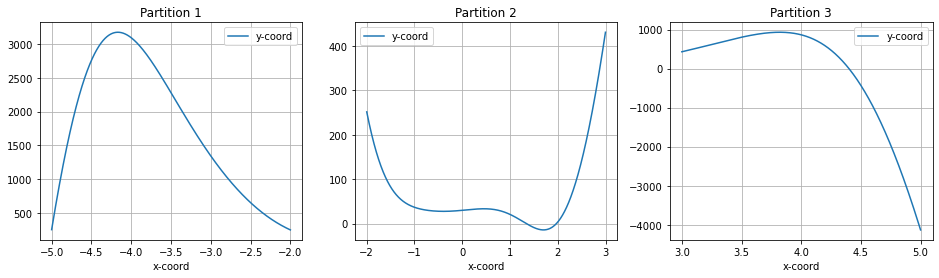

In [9]:
# plot partitions
fig1, axes = plt.subplots(1, 3, figsize=(16, 4))
df1.plot(ax=axes[0], x='x-coord', y='y-coord', grid=True, title='Partition 1')
df2.plot(ax=axes[1], x='x-coord', y='y-coord', grid=True, title='Partition 2')
df3.plot(ax=axes[2], x='x-coord', y='y-coord', grid=True, title='Partition 3');

In [10]:
# partition 1
min_y1 = df1['y-coord'].max()
min_x1 = df1['x-coord'].where(df1['y-coord'] == min_y1).dropna().values[0]
print(f'local maximum 1: ({round(min_x1, 2)}, {round(min_y1, 2)})')

local maximum 1: (-4.17, 3171.36)


In [11]:
# partition 2
min_y2 = df2['y-coord'].min()
min_x2 = df2['x-coord'].where(df2['y-coord'] == min_y2).dropna().values[0]
print(f'Local minimum 2: ({round(min_x2, 2)}, {round(min_y2, 2)})')

Local minimum 2: (1.7, -14.11)


In [12]:
# partition 3
min_y3 = df3['y-coord'].max()
min_x3 = df3['x-coord'].where(df3['y-coord'] == min_y3).dropna().values[0]
print(f'local maximum 3: ({round(min_x3, 2)}, {round(min_y3, 2)})')

local maximum 3: (3.82, 932.26)


In [24]:
# roots of the function (partition 2)
roots = df2[df2['y-coord'].between(-0.02, 0.05)]\
                          .reset_index(drop=True)

root1 = roots['x-coord'].iloc[0]
root2 = roots['x-coord'].iloc[1]

display(roots)
print(f'Roots: ({round(root1, 2)}, {round(root2, 2)})')

,x-coord,y-coord
0,1.34,0.04
1,1.97,-0.02


Roots: (1.34, 1.97)


In [16]:
# devide the graph into four intervals
x_down_pos = np.arange(1.2, root1, step)
x_down_neg = np.arange(root1, min_x2, step)
x_up_neg = np.arange(min_x2, root2, step)
x_up_pos = np.arange(root2, 2.1, step)

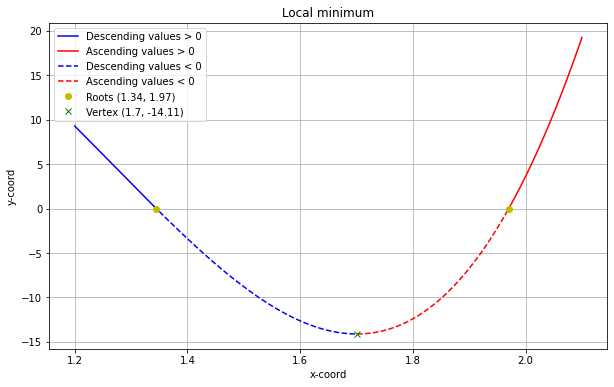

In [27]:
# plot the graph
plt.plot(x_down_pos, f(x_down_pos), 'b', 
         label='Descending values > 0',)

plt.plot(x_up_pos, f(x_up_pos), 'r', 
         label='Ascending values > 0')

plt.plot(x_down_neg, f(x_down_neg), 'b', linestyle = 'dashed', 
         label='Descending values < 0')

plt.plot(x_up_neg, f(x_up_neg), 'r', linestyle = 'dashed', 
         label='Ascending values < 0')

plt.plot(root1, 0, 'yo', label=f'Roots ({round(root1, 2)}, {round(root2, 2)})')
plt.plot(root2, 0, 'yo')

plt.plot(min_x2, min_y2, 'gx', 
         label=f'Vertex ({round(min_x2, 2)}, {round(min_y2, 2)})')

plt.title('Local minimum', loc='center')
plt.xlabel('x-coord')
plt.ylabel('y-coord')
plt.legend()
plt.grid();